In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
matches=pd.read_csv("IPL_matches.csv")
deliveries = pd.read_csv("IPL_deliveries.csv")

In [3]:
df = matches[(matches['team1'] == 'Chennai Super Kings') | (matches['team2'] == 'Chennai Super Kings')]
india = df.iloc[:]
india.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
60,61,2008,Chandigarh,4/19/2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
66,67,2008,Chennai,4/23/2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
70,71,2008,Chennai,4/26/2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
73,74,2008,Bangalore,4/28/2008,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
78,79,2008,Chennai,5/2/2008,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN


In [4]:
india['date']

60     4/19/2008
66     4/23/2008
70     4/26/2008
73     4/28/2008
78      5/2/2008
         ...    
745     1/5/2019
750     5/5/2019
752     7/5/2019
754    10/5/2019
755    12/5/2019
Name: date, Length: 164, dtype: object

In [5]:
#Toss affecting the win dataframe
toss_win_result = matches.groupby(['toss_winner']).winner.value_counts().reset_index(name="count")
toss_win_result['result']=np.where(toss_win_result.winner==toss_win_result.toss_winner,'won','lost')
toss_win_result_df = toss_win_result.groupby(['toss_winner','result'])['count'].sum().reset_index()

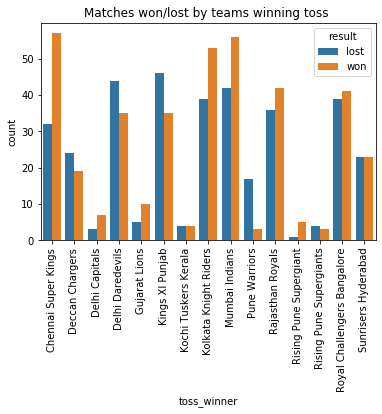

In [6]:
#Visualization
plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_win_result_df)
plot.set_title('Matches won/lost by teams winning toss ')
plot.set_xticklabels(toss_win_result_df['toss_winner'].unique(),rotation=90)
plt.show()

In [7]:
#Winning stats of teams bat/field first by venues 
venue_toss_decision_result=matches[["toss_winner","toss_decision","winner","venue"]]
venue_toss_decision_result["decision"]=np.where((venue_toss_decision_result.toss_winner == venue_toss_decision_result.winner) & (venue_toss_decision_result.toss_decision=="field"),"field_won","bat_won")
venue_result=venue_toss_decision_result.groupby(["venue"]).decision.value_counts().reset_index(name="count")

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


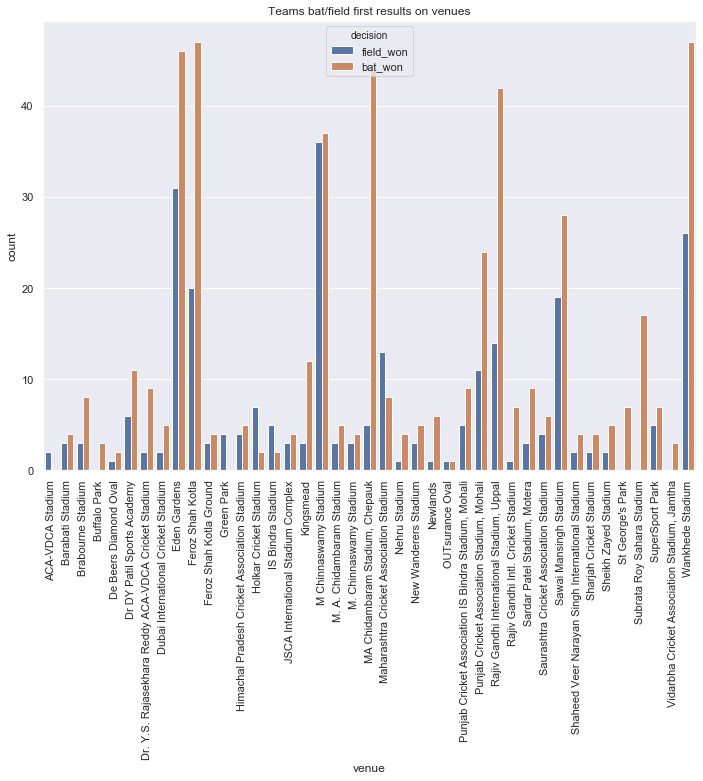

In [8]:
#Visualization
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.barplot(x="venue", y="count", hue="decision", data=venue_result)
plot.set_title('Teams bat/field first results on venues')
plot.set_xticklabels(venue_result['venue'].unique(),rotation=90)
plt.show()

In [9]:
def annotation_plot(ax,w,h):                                  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

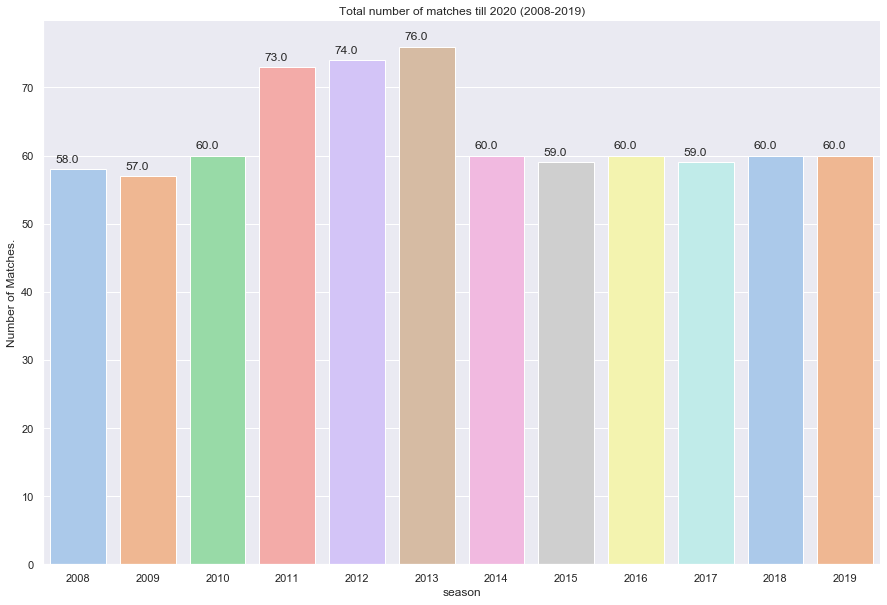

In [10]:
total_matches = matches.groupby('season')['id'].count()
plt.figure(figsize=(15,10))
ax = sns.countplot("season", data = matches, palette='pastel')
plt.title('Total number of matches till 2020 (2008-2019)')
plt.ylabel('Number of Matches.')
annotation_plot(ax,0.08,1)
plt.show()

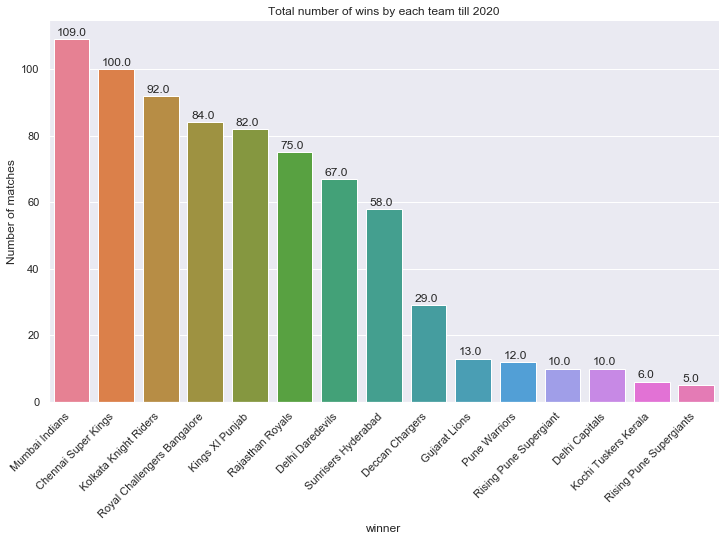

In [11]:
plt.figure(figsize=(12,7))
ax = sns.countplot("winner", data = matches, order = matches['winner'].value_counts().index,palette="husl")
plt.title("Total number of wins by each team till 2020")
plt.xticks(rotation=45, ha = 'right')
plt.ylabel('Number of matches')
annotation_plot(ax,0.08,1)
plt.show()

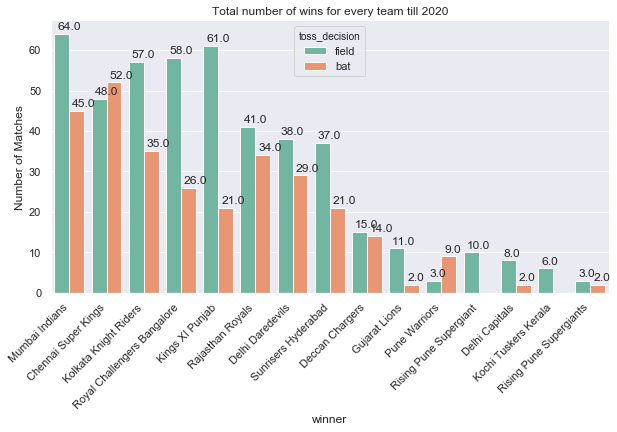

In [12]:
plt.figure(figsize=(10,5))
ax = sns.countplot("winner", data = matches, hue = 'toss_decision',order = matches['winner'].value_counts().index,palette="Set2")
plt.title("Total number of wins for every team till 2020")
plt.xticks(rotation=45, ha = 'right')
plt.ylabel('Number of Matches')
annotation_plot(ax,0.08,1)
plt.show()

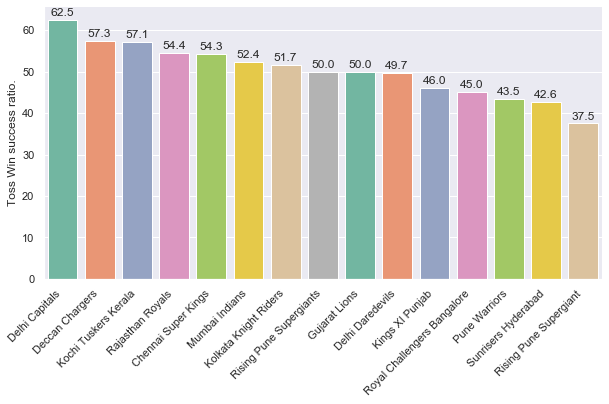

In [13]:
Total_matches_played = matches['team1'].value_counts() + matches['team2'].value_counts()

toss_won = matches['toss_winner'].value_counts()
toss_win_success_rate = (toss_won/Total_matches_played)*100
toss_win_success_rate_sort = toss_win_success_rate.sort_values(ascending = False)
plt.figure(figsize = (10,5))
ax = sns.barplot(x =toss_win_success_rate_sort.index, y = toss_win_success_rate_sort,palette='Set2')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Toss Win success ratio.')
annotation_plot(ax,0.08,1)
plt.show()

In [14]:
IPL_Teams = ['Mumbai Indians', 'Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab', 
            'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Sun Risers Hyderabad', 'Rajasthan Royals']
df_teams_1 = matches[matches['team1'].isin(IPL_Teams)]
df_teams_2 = matches[matches['team2'].isin(IPL_Teams)]
df_teams = pd.concat((df_teams_1, df_teams_2))
df_teams.drop_duplicates()
df_teams.count()

id                 1048
season             1048
city               1038
date               1048
team1              1048
team2              1048
toss_winner        1048
toss_decision      1048
result             1048
dl_applied         1048
winner             1043
win_by_runs        1048
win_by_wickets     1048
player_of_match    1043
venue              1048
umpire1            1046
umpire2            1046
umpire3             193
dtype: int64

In [15]:
df_teams = df_teams.drop(['id','season','city','date','toss_winner','toss_decision','result','dl_applied','win_by_runs','win_by_wickets','player_of_match','venue','umpire1','umpire2','umpire3'
], axis=1)
df_teams.head()

,team1,team2,winner
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
7,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab
10,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders


In [16]:
df_teams = df_teams.reset_index(drop=True)
df_teams.loc[df_teams.winner == df_teams.team1,'winning_team']=1
df_teams.loc[df_teams.winner == df_teams.team2, 'winning_team']=2
df_teams = df_teams.drop(['winning_team'], axis=1)

df_teams.head()

,team1,team2,winner
0,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
1,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
2,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
3,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab
4,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders


In [17]:
df_teams.isnull().sum()

team1     0
team2     0
winner    5
dtype: int64

In [18]:
df_teams=df_teams.dropna(axis=0)

In [19]:
#convert team_1 and team_2 from categorical variables to continous inputs 

# Get dummy variables
final = pd.get_dummies(df_teams, prefix=['team1', 'team2'], columns=['team1', 'team2'])

# Separate X and y sets
X = final.drop(['winner'], axis=1)
y = final["winner"]


# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

final.head()

,winner,team1_Chennai Super Kings,team1_Deccan Chargers,team1_Delhi Capitals,team1_Delhi Daredevils,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,...,team2_Kings XI Punjab,team2_Kochi Tuskers Kerala,team2_Kolkata Knight Riders,team2_Mumbai Indians,team2_Pune Warriors,team2_Rajasthan Royals,team2_Rising Pune Supergiant,team2_Rising Pune Supergiants,team2_Royal Challengers Bangalore,team2_Sunrisers Hyderabad
0,Rising Pune Supergiant,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,Royal Challengers Bangalore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mumbai Indians,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,Kings XI Punjab,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Kolkata Knight Riders,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=0)
rf.fit(X_train, y_train) 

score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)


print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.666
Test set accuracy:  0.636


In [21]:
fixtures = pd.read_csv('fixtures.csv')
ranking = pd.read_csv('ipl_rankings.csv') 

# List for storing the group stage games

pred_set = []

In [22]:
# Create new columns with ranking position of each team

fixtures.insert(1, 'first_position', fixtures['team1'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['team2'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset

fixtures = fixtures.iloc[:56, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,team1,team2,Group,Result
51,4,1,8,14/10/2020 19:30,Dubai International Cricket Stadium,Delhi Capitals,Rajasthan Royals,NaN,NaN
52,4,3,6,15/10/2020 19:30,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kings XI Punjab,NaN,NaN
53,4,3,4,12/10/2020 19:30,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,NaN,NaN
54,4,2,4,16/10/2020 19:30,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,Kolkata Knight Riders,NaN,NaN
55,4,5,8,11/10/2020 15:30,Dubai International Cricket Stadium,Sunrisers Hyderabad,Rajasthan Royals,NaN,NaN


In [23]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'team1': row['team1'], 'team2': row['team2'], 'winning_team': None})
    else:
        pred_set.append({'team1': row['team2'], 'team2': row['team1'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,team1,team2,winning_team
0,Mumbai Indians,Chennai Super Kings,None
1,Chennai Super Kings,Rajasthan Royals,None
2,Delhi Capitals,Chennai Super Kings,None
3,Delhi Capitals,Kings XI Punjab,None
4,Delhi Capitals,Chennai Super Kings,None


In [24]:
# Get dummy variables and drop winning_team column

pred_set = pd.get_dummies(pred_set, prefix=['team1', 'team2'], columns=['team1', 'team2'])

# Add missing columns compared to the model's training dataset

missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


pred_set = pred_set.drop(['winner'], axis=1)
pred_set.head()

,team1_Chennai Super Kings,team1_Deccan Chargers,team1_Delhi Capitals,team1_Delhi Daredevils,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Pune Warriors,...,team2_Kings XI Punjab,team2_Kochi Tuskers Kerala,team2_Kolkata Knight Riders,team2_Mumbai Indians,team2_Pune Warriors,team2_Rajasthan Royals,team2_Rising Pune Supergiant,team2_Rising Pune Supergiants,team2_Royal Challengers Bangalore,team2_Sunrisers Hyderabad
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#group matches 
predictions = rf.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    
    else:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print("")

Chennai Super Kings and Mumbai Indians
Winner: Mumbai Indians

Rajasthan Royals and Chennai Super Kings
Winner: Chennai Super Kings

Chennai Super Kings and Delhi Capitals
Winner: Delhi Capitals

Kings XI Punjab and Delhi Capitals
Winner: Delhi Capitals

Chennai Super Kings and Delhi Capitals
Winner: Delhi Capitals

Kings XI Punjab and Delhi Capitals
Winner: Delhi Capitals

Kings XI Punjab and Royal Challengers Bangalore
Winner: Royal Challengers Bangalore

Kolkata Knight Riders and Mumbai Indians
Winner: Mumbai Indians

Sunrisers Hyderabad and Kolkata Knight Riders
Winner: Kolkata Knight Riders

Rajasthan Royals and Chennai Super Kings
Winner: Chennai Super Kings

Sunrisers Hyderabad and Royal Challengers Bangalore
Winner: Royal Challengers Bangalore

Kings XI Punjab and Royal Challengers Bangalore
Winner: Royal Challengers Bangalore

Chennai Super Kings and Mumbai Indians
Winner: Mumbai Indians

Kolkata Knight Riders and Mumbai Indians
Winner: Mumbai Indians

Sunrisers Hyderabad and 

In [26]:
# List of tuples before 

semi = [('Kolkata Knight Riders', 'Delhi Capitals'),
            ('Mumbai Indians', 'Royal Challengers Bangalore')]

In [27]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to ICC ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1
        
        # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['winner'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

In [28]:
clean_and_predict(semi, ranking, final, rf)

Kolkata Knight Riders and Delhi Capitals
Winner: Delhi Capitals

Royal Challengers Bangalore and Mumbai Indians
Winner: Mumbai Indians



In [29]:
# Finals

finals = [('Delhi Capitals', 'Mumbai Indians')]
clean_and_predict(finals, ranking, final, rf)

Mumbai Indians and Delhi Capitals
Winner: Delhi Capitals



# IPL 2020 WINNER Delhi Capitals